In [2]:
!pip install pandas numpy matplotlib seaborn scikit-learn

# Import Necessary Libraries

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Display plots inline
%matplotlib inline


# pandas and numpy are used for data manipulation.
# matplotlib and seaborn are used for data visualization.
# StandardScaler is used to standardize the data before clustering.
# KMeans is the clustering algorithm we will use.
# silhouette_score helps to evaluate the quality of the clustering.

# Load the dataset

In [5]:
# Load the dataset
df = pd.read_csv(r'E:\customer_data.csv')

# Display the first 5 rows of the dataset
df.head()



# Load the dataset (e.g., customer_data.csv) into a DataFrame and display the first 5 rows to get an overview of the data.

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


# Explore the data

In [6]:
# Get basic information about the dataset
df.info()

# Summary statistics
df.describe()

# Check for missing values
df.isnull().sum()



# df.info() provides a summary of the dataset, including data types and non-null counts.
# df.describe() provides descriptive statistics, such as mean, median, etc.
# Checking for missing values helps to identify any potential issues with the data.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

# Data Preprocessing

In [8]:
# Dropping any missing values (if any)
df.dropna(inplace=True)

# Selecting relevant features for clustering
features = df[['Annual Income ($)', 'Spending Score (1-100)', 'Age']]

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Convert back to DataFrame for better readability
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# Display the first 5 rows of the scaled data
scaled_df.head()





# Dropping missing values ensures clean data.
# Selecting relevant features such as Annual Income, Spending Score, and Age for clustering.
# Standardizing the data using StandardScaler ensures that each feature contributes equally to the clustering.

,Annual Income ($),Spending Score (1-100),Age
0,-2.086675,-0.431850,-1.052345
1,-1.650205,1.069755,-0.981941
2,-0.537207,-1.611684,-1.017143
3,-1.126441,0.926745,-0.911538
4,-1.584734,-0.396098,-0.629924


# Determine the Optimal Number of Clusters

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

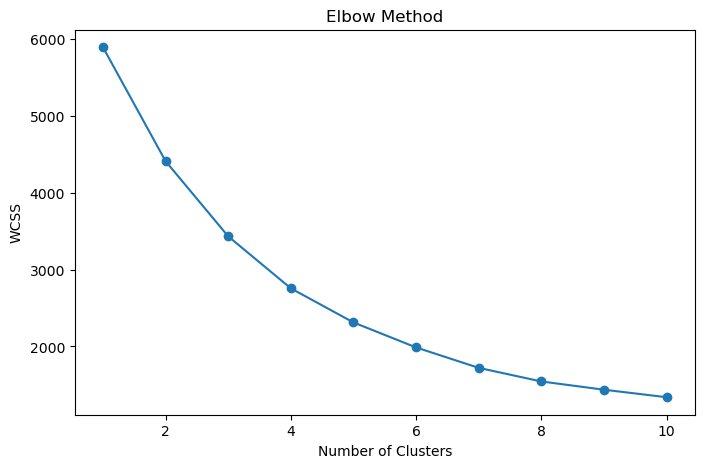

In [9]:
# Using the Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

# Plotting the results
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()



# The Elbow method helps to determine the optimal number of clusters by plotting the WCSS (Within-Cluster Sum of Squares) against the number of clusters.
# The optimal number of clusters is at the "elbow" point where the WCSS starts to decrease more slowly.

# Apply K-Means Clustering

In [10]:
# Apply K-Means clustering with the optimal number of clusters (assumed to be 4)
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_df)

# Add the cluster labels to the original dataframe
df['Cluster'] = clusters

# Display the first 5 rows with the cluster labels
df.head()




# Apply K-means clustering with the optimal number of clusters identified in the previous step.
# The fit_predict method assigns each customer to a cluster, and these labels are added to the original DataFrame.

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Cluster
0,1,Male,19,15000,39,Healthcare,1,4,0
1,2,Male,21,35000,81,Engineer,3,3,2
2,3,Female,20,86000,6,Engineer,1,1,0
3,4,Female,23,59000,77,Lawyer,0,2,2
4,5,Female,31,38000,40,Entertainment,2,6,0


# Visualize the Clusters - Pie Chart

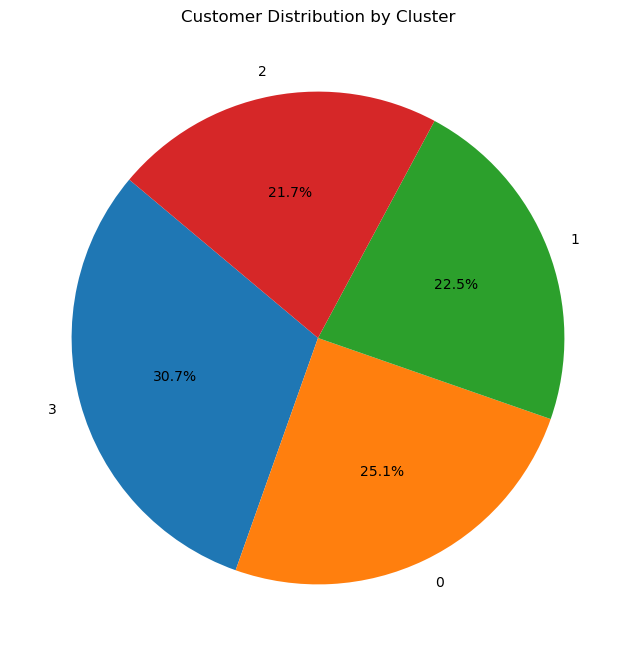

In [11]:
# Count the number of customers in each cluster
cluster_counts = df['Cluster'].value_counts()

# Plotting a pie chart for cluster distribution
plt.figure(figsize=(8,8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Customer Distribution by Cluster')
plt.show()





# The pie chart visualizes the proportion of customers in each cluster, giving a sense of how the customer base is segmented.

# Visualize the Clusters - Bar Graph

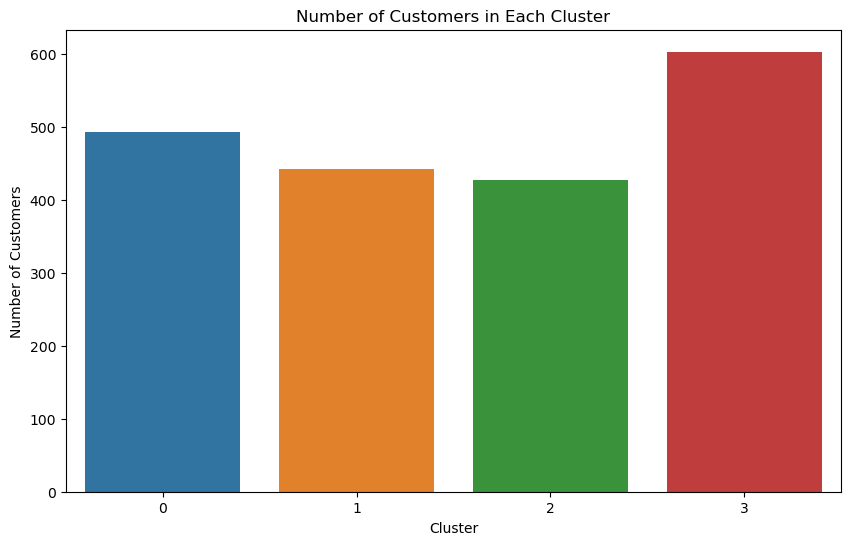

In [12]:
# Plotting bar graph of cluster counts
plt.figure(figsize=(10,6))
sns.countplot(x='Cluster', data=df)
plt.title('Number of Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()




# A bar graph provides a clear visual of how many customers fall into each cluster, making it easy to compare sizes across clusters.

# Visualize the Clusters - Scatter Plot

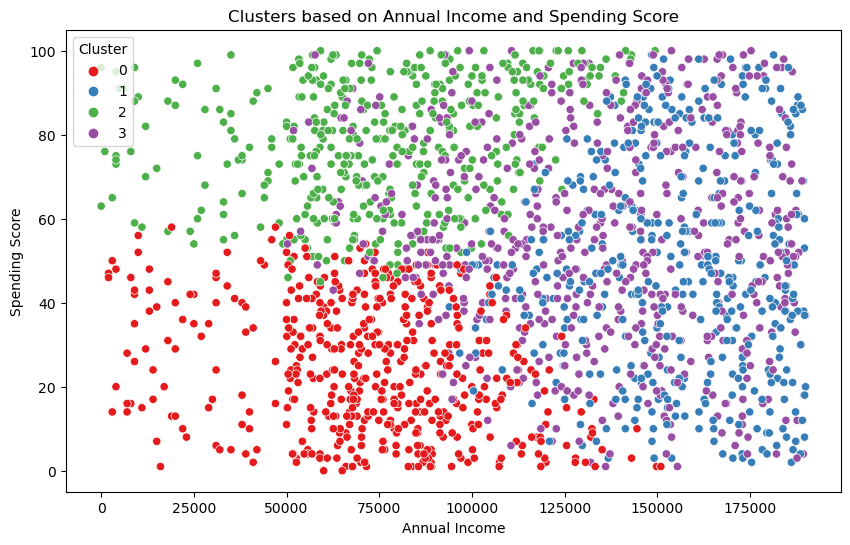

In [14]:
# Plotting a scatter plot for two features colored by cluster
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income ($)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1')
plt.title('Clusters based on Annual Income and Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()



# The scatter plot helps to visualize the clustering based on Annual Income and Spending Score, with each cluster shown in a different color.

# Evaluate the Clustering Model

In [15]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(scaled_df, clusters)
print(f'Silhouette Score: {silhouette_avg:.3f}')




# The silhouette score evaluates how well the clusters are separated from each other. A higher score indicates better-defined clusters.

Silhouette Score: 0.265


# Summary and Insights

In [18]:
# Select only the numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Add the 'Cluster' column to group by
numeric_columns['Cluster'] = df['Cluster']

# Analyzing each cluster based on average feature values
cluster_analysis = numeric_columns.groupby('Cluster').mean()
print(cluster_analysis)


          CustomerID        Age  Annual Income ($)  Spending Score (1-100)  \
Cluster                                                                      
0         840.395538  48.776876       72553.239351               24.342799   
1        1152.486425  23.013575      154824.610860               48.927602   
2         824.302108  34.194379       76278.189696               78.032787   
3        1144.142620  78.371476      133645.849088               55.427861   

         Work Experience  Family Size  
Cluster                                
0               3.995943     3.620690  
1               4.341629     3.952489  
2               3.770492     3.562061  
3               4.217247     3.864013  


# Final Step: Save and Display the Final Output

In [19]:
# Save the final DataFrame with cluster labels to a new CSV file
df.to_csv('customer_segments.csv', index=False)

# Display the first 5 rows of the final DataFrame
df.head()





# Save the final DataFrame with cluster labels to a CSV file for future use.
# Display the first 5 rows of the final dataset with cluster information.

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Cluster
0,1,Male,19,15000,39,Healthcare,1,4,0
1,2,Male,21,35000,81,Engineer,3,3,2
2,3,Female,20,86000,6,Engineer,1,1,0
3,4,Female,23,59000,77,Lawyer,0,2,2
4,5,Female,31,38000,40,Entertainment,2,6,0
